# Импортируем необходимые библиотеки

## 1. Библиотеки для работы с данными

In [174]:
import numpy as np
import pandas as pd

## 2. Библиотеки для работы с моделями

In [435]:
# Импортируем модуль для создания модели
from sklearn.ensemble import RandomForestClassifier # Случайный лес

# Импортируем метрики для анализа моделей
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from datetime import datetime as time

# Метод для разделения данных
from sklearn.model_selection import train_test_split

## 3. Библиотека для визуализации данных 

In [366]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Работа с данными

In [367]:
#Считываем csv - файл
file_path = r'./simplified_coffee.csv'
df = df = pd.DataFrame()
df = df = pd.read_csv(file_path)

In [368]:
# Выводим название всех колонок
df.columns

Index(['name', 'roaster', 'roast', 'loc_country', 'origin_1', '100g_USD',
       'rating', 'review_date', 'desc_1'],
      dtype='object')

# Колонки

***name*** - Название смеси

***roaster*** - Имя обжарщика

***roast*** - Тип обжарки

***loc_country*** - Расположение жаровни

***origin_1*** - Тип обжарки

***100g_USD*** - цена за 100 г в долларах США

***rating*** - Рейтинг

***review_date*** - Дата отзыва

***desc_1*** - текст отзыва


In [369]:
# Оставляем только те колонки которые нам понадобятся
df = df[['name', 'roaster', 'roast', 'loc_country', 'origin_1', '100g_USD', 'rating']]

In [370]:
# При анализе dataframe(df) выясняется, что он содержит строки с некорректными данными
df.sample(5)

,name,roaster,roast,loc_country,origin_1,100g_USD,rating
856,Testi Ayla Double Ethiopia,Barrington Coffee Roasting,Light,United States,Ethiopia,16.15,97
265,Kivu Belt Lot 32 Espresso,JBC Coffee Roasters,Medium-Light,United States,Rwanda,4.76,93
195,Camilina Geisha,Bird Rock Coffee Roasters,Medium-Light,United States,Panama,19.84,94
4,Ethiopia Gelgelu Natural Organic,Willoughby's Coffee & Tea,Medium-Light,United States,Ethiopia,3.97,93
246,Ecuador Finca Carolina Fausto Romo,PT's Coffee Roasting Co.,Medium-Light,United States,Ecuador,6.91,93


In [371]:
# Выводим информациб о df
# Убедились, что колонки с числовыми типами имеют тип который нам не подходит
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         1267 non-null   object
 1   roaster      1267 non-null   object
 2   roast        1255 non-null   object
 3   loc_country  1267 non-null   object
 4   origin_1     1267 non-null   object
 5   100g_USD     1267 non-null   object
 6   rating       1267 non-null   object
dtypes: object(7)
memory usage: 34.7+ KB


In [372]:
# Убираем некоректные строки
# Конвертируем колонки в нужный тип
df = df.query("(rating != 'United States')" or "(100g_USD != 'United States')").astype({'rating':int, '100g_USD':float})

In [373]:
# Проверяем
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1246 entries, 0 to 1266
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1246 non-null   object 
 1   roaster      1246 non-null   object 
 2   roast        1234 non-null   object 
 3   loc_country  1246 non-null   object 
 4   origin_1     1246 non-null   object 
 5   100g_USD     1246 non-null   float64
 6   rating       1246 non-null   int32  
dtypes: float64(1), int32(1), object(5)
memory usage: 48.7+ KB


In [374]:
# Получаем статистическую информацию о df
df.describe()

,100g_USD,rating
count,1246.000000,1246.000000
mean,10.479125,93.306581
std,13.486674,1.479413
min,0.170000,84.000000
25%,5.260000,93.000000
50%,6.170000,93.000000
75%,9.600000,94.000000
max,132.280000,97.000000


array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

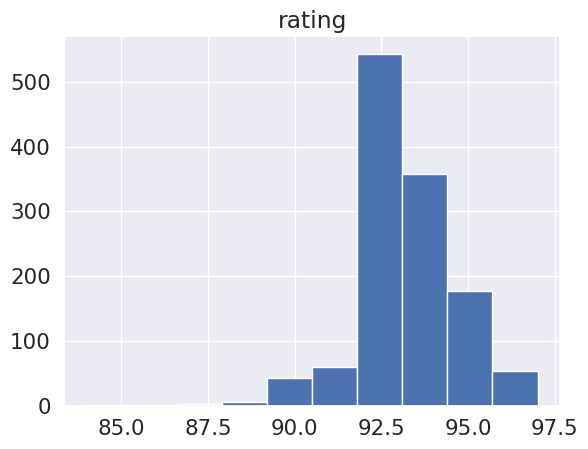

In [375]:
# Распределение величин рейтинга
df[['rating']].hist()

In [376]:
# Ищем значение рейтинга которое находится в средине
print(len(df))
df[df['rating']>93]['name'].count()

1246


588

Прежде чем приступить к классификации необходимо закодировать информацию, которая представлена текстом 

In [377]:
col=['name', 'roaster', 'roast', 'loc_country', 
     'origin_1', '100g_USD', 'rating']

X=pd.DataFrame()
for i in col:
    if df[i].dtype.name != 'object':
        X[i]=df[i].copy()
        X.loc[X[i].isna(), i]=X[i].median()
    else:
        X[i]=pd.factorize(df[i])[0]

In [378]:
# Так выглядят данные после кодирования.
# Теперь система сможет их распознавать
X.sample(3)

,name,roaster,roast,loc_country,origin_1,100g_USD,rating
136,133,47,0,0,4,5.88,92.0
272,257,11,0,3,1,4.67,91.0
452,426,30,1,0,0,10.58,91.0


In [379]:
# Y будет равен нулю если рейтинг 93 и меньше, и единице если больше 93
Y=df['rating'].apply(lambda x: 1 if x>93 else 0).values

In [419]:
#разделим набор на тренировочный и тестовый
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=27)

# Модель

In [420]:
# Создаем модели
start_time = time.now()
model_1 = RandomForestClassifier(n_estimators=100)
print("Время создания 100 деревьев - ", time.now() - start_time)

start_time = time.now()
model_2 = RandomForestClassifier(n_estimators=500)
print("Время создания 500 деревьев - ", time.now() - start_time)

start_time = time.now()
model_3 = RandomForestClassifier(n_estimators=1000)
print("Время создания 1000 деревьев - ", time.now() - start_time)

Время создания 100 деревьев -  0:00:00.001000
Время создания 500 деревьев -  0:00:00.003000
Время создания 1000 деревьев -  0:00:00.004000


In [421]:
time_train = []
# Обучаем модели
start_time = time.now()
model_1.fit(X_train, y_train)
time_train.append((time.now() - start_time).total_seconds())
print("Время обуения 100 деревьев - ", time_train[0], "с")

start_time = time.now()
model_2.fit(X_train, y_train)
time_train.append((time.now() - start_time).total_seconds())
print("Время обуения 500 деревьев - ", time_train[1], "с")

start_time = time.now()
model_3.fit(X_train, y_train)
time_train.append((time.now() - start_time).total_seconds())
print("Время обуения 1000 деревьев - ", time_train[2], "с")

Время обуения 100 деревьев -  0.477 с
Время обуения 500 деревьев -  2.199 с
Время обуения 1000 деревьев -  4.405 с


<Figure size 1000x1000 with 0 Axes>

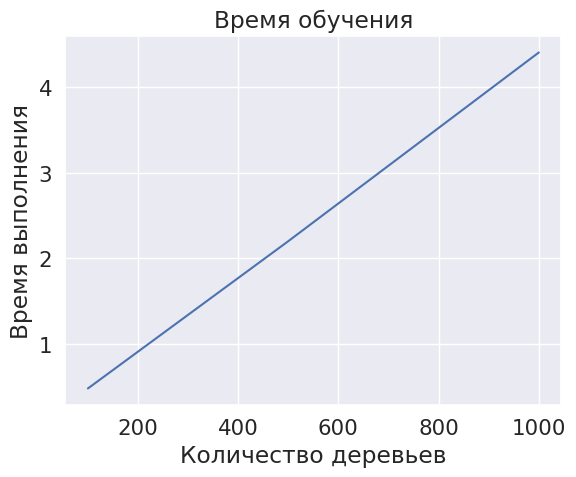

<Figure size 1000x1000 with 0 Axes>

In [422]:
plt.plot([100, 500, 1000], time_train)
plt.xlabel("Количество деревьев")
plt.ylabel("Время выполнения")
plt.title("Время обучения")
plt.figure(figsize=(10, 10))

In [433]:
importances = model_3.feature_importances_
indices = np.argsort(importances)[::-1]

ar_f=[]
for f, idx in enumerate(indices):
    ar_f.append([round(importances[idx],4), col[idx]])
print("1000 деревьев", "Значимость признаков:", sep='\n')
ar_f.sort(reverse=True)
ar_f

1000 деревьев
Значимость признаков:


[[0.2512, 'roaster'],
 [0.2369, 'name'],
 [0.1896, '100g_USD'],
 [0.1347, 'origin_1'],
 [0.0882, 'rating'],
 [0.0504, 'loc_country'],
 [0.049, 'roast']]

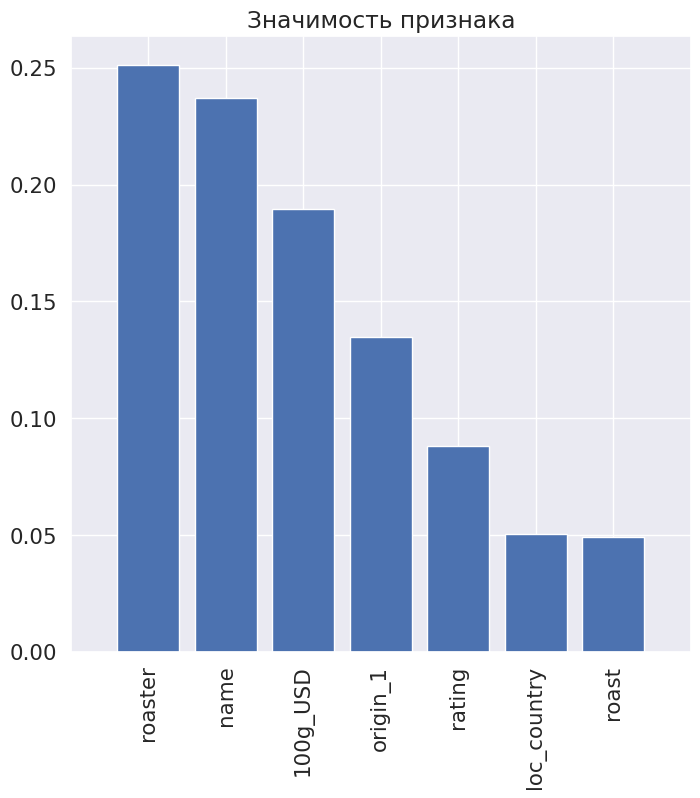

In [424]:
#удобнее отобразить на столбчатой диаграмме
d_first = len(col)
plt.figure(figsize=(8, 8))
plt.title("Значимость признака")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(col)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

In [442]:
# метрика, насколько точно мы предсказываем правильные значения как для 0, так и 1
accuracy = []
accuracy.extend([
    metrics.accuracy_score(y_test, model_1.predict(X_test)),
    metrics.accuracy_score(y_test, model_2.predict(X_test)),
    metrics.accuracy_score(y_test, model_3.predict(X_test))
])

print("Accuracy 100:\t", accuracy[0])
print("Accuracy 500:\t", accuracy[1])
print("Accuracy 1000:\t",accuracy[2])

Accuracy 100:	 0.676
Accuracy 500:	 0.684
Accuracy 1000:	 0.664


<Figure size 1000x1000 with 0 Axes>

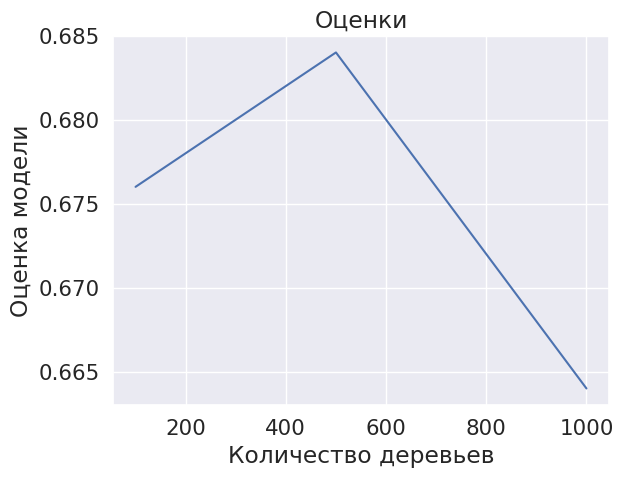

<Figure size 1000x1000 with 0 Axes>

In [452]:
plt.plot([100, 500, 1000], accuracy)
plt.xlabel("Количество деревьев")
plt.ylabel("Оценка модели")
plt.title("Оценки")
plt.figure(figsize=(10, 10))

In [396]:
# матрица количества правильно и ошибочно угаданных классов
print(confusion_matrix(y_test, model_1.predict(X_test)))
print(confusion_matrix(y_test, model_2.predict(X_test)))
print(confusion_matrix(y_test, model_3.predict(X_test)))

[[152  43]
 [ 74 105]]
[[150  45]
 [ 74 105]]
[[150  45]
 [ 74 105]]


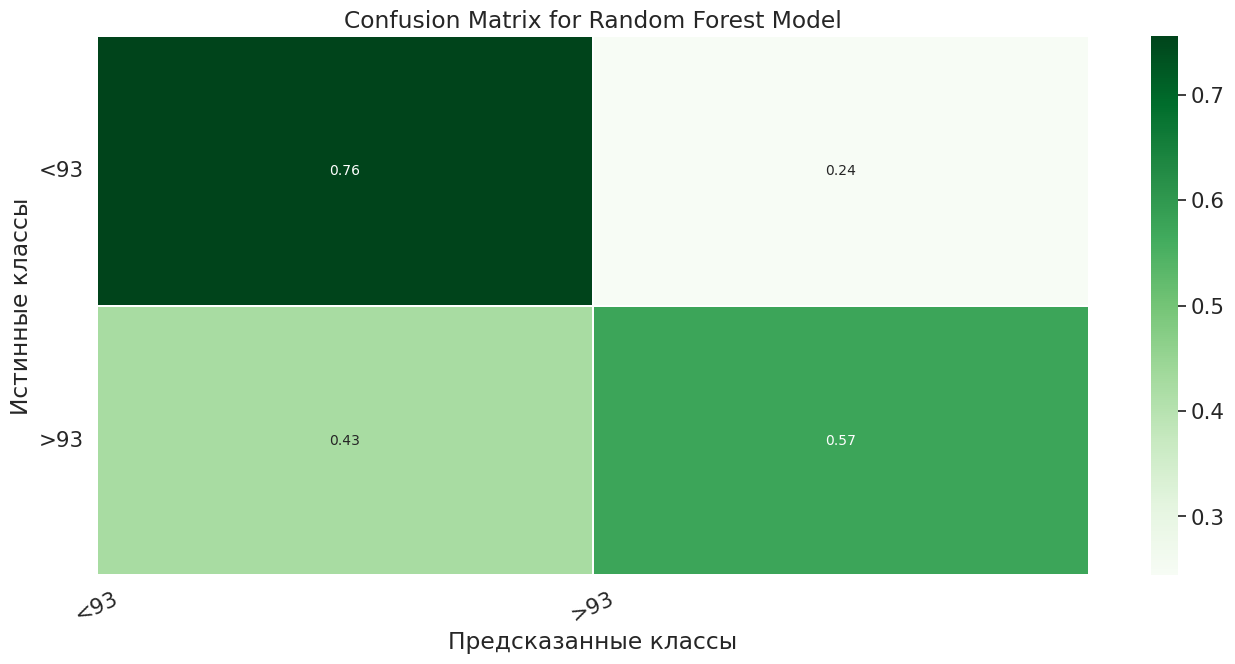

In [436]:
# матрица количества правильно и ошибочно угаданных классов
# так же матрица в процентах и более изящном виде
matrix = confusion_matrix(y_test, model.predict(X_test))
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Настройка диаграммы 
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Добавим описания
class_names = ['<93', '>93']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [455]:
print("100 деревьев:", classification_report(y_test, model_1.predict(X_test)), sep='\n')
print("500 деревьев:", classification_report(y_test, model_2.predict(X_test)), sep='\n')
print("1000 деревьев:", classification_report(y_test, model_3.predict(X_test)), sep='\n')

100 деревьев:
              precision    recall  f1-score   support

           0       0.68      0.75      0.71       135
           1       0.67      0.59      0.63       115

    accuracy                           0.68       250
   macro avg       0.67      0.67      0.67       250
weighted avg       0.68      0.68      0.67       250

500 деревьев:
              precision    recall  f1-score   support

           0       0.70      0.73      0.71       135
           1       0.67      0.63      0.65       115

    accuracy                           0.68       250
   macro avg       0.68      0.68      0.68       250
weighted avg       0.68      0.68      0.68       250

1000 деревьев:
              precision    recall  f1-score   support

           0       0.68      0.73      0.70       135
           1       0.65      0.59      0.62       115

    accuracy                           0.66       250
   macro avg       0.66      0.66      0.66       250
weighted avg       0.66      0.